In [1]:
import math
import numpy as np
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe
from openrtdynamics2.ORTDtoNumpy import ORTDtoNumpy
import openrtdynamics2.targets as tg

import matplotlib.pyplot as plt

from helper_fn import * 

In [2]:
system = dy.enter_system()

# the diagram
activation_sample = dy.system_input( dy.DataTypeFloat64(1), name='activation_sample', default_value=5 ,  value_range=[0, 100], title="input #1")

activate_subsystem = dy.logic_and( dy.counter() >= activation_sample, (dy.counter()-15) < activation_sample )

with dy.sub_if(activate_subsystem, prevent_output_computation=False ) as system:

    cnt = dy.counter()
    
    system.set_outputs([ cnt ])

cnt = system.outputs[0]

# define output(s)
dy.append_output(cnt, 'cnt')
dy.append_output(activate_subsystem, 'activate_subsystem')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#
dy.clear()

compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


In [3]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=30)

In [4]:
sim_results['cnt']

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.])

In [5]:
assert_equal( sim_results['cnt'] , [0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.] )

In [6]:
sim_results['activate_subsystem']

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
system = dy.enter_system()

# the diagram
activation_sample = dy.system_input( dy.DataTypeFloat64(1), name='activation_sample', default_value=5 ,  value_range=[0, 100], title="input #1")

activate_subsystem = dy.logic_and( dy.counter() >= activation_sample, (dy.counter()-15) < activation_sample )

with dy.sub_if(activate_subsystem, prevent_output_computation=False ) as system:

    cnt1 = dy.sum( 1 )
    cnt2 = dy.sum( 1, no_delay=True )
    cnt3 = dy.sum( 1, no_delay=True, initial_state=-1 )
    cnt4 = dy.euler_integrator( dy.float64(0.1), Ts=1.0, initial_state=dy.float64(-5) )
    
    system.set_outputs([ cnt1, cnt2, cnt3, cnt4 ])

# define output(s)
dy.append_output(system.outputs[0], 'cnt1')
dy.append_output(system.outputs[1], 'cnt2')
dy.append_output(system.outputs[2], 'cnt3')
dy.append_output(system.outputs[3], 'cnt4')
dy.append_output(activate_subsystem, 'activate_subsystem')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#
dy.clear()

compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


In [8]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=30)

In [9]:
sim_results['cnt1']

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.])

In [10]:
sim_results['cnt2']

array([ 1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
        9., 10., 11., 12., 13., 14., 15., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16.])

In [11]:
sim_results['cnt3']

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.])

In [12]:
sim_results['cnt4']

array([-5. , -5. , -5. , -5. , -5. , -5. , -4.9, -4.8, -4.7, -4.6, -4.5,
       -4.4, -4.3, -4.2, -4.1, -4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.5,
       -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5, -3.5])

In [13]:
sim_results['activate_subsystem']

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
assert_equal( sim_results['cnt1'] , [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.] )

In [15]:
assert_equal( sim_results['cnt2'] , [ 1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
        9., 10., 11., 12., 13., 14., 15., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16.] )

In [16]:
assert_equal( sim_results['cnt3'] , [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.] )

In [17]:
system = dy.enter_system()

# the diagram
activation_sample = dy.system_input( dy.DataTypeFloat64(1), name='activation_sample', default_value=5 ,  value_range=[0, 100], title="input #1")

activate_subsystem = dy.logic_and( dy.counter() >= activation_sample, (dy.counter()-15) < activation_sample )

with dy.sub_if(activate_subsystem, prevent_output_computation=True ) as system:

    cnt1 = dy.sum( 1 )
    cnt2 = dy.sum( 1, no_delay=True )
    cnt3 = dy.sum( 1, no_delay=True, initial_state=-1 )
    cnt4 = dy.euler_integrator( dy.float64(0.1), Ts=1.0, initial_state=dy.float64(-5) )
    
    system.set_outputs([ cnt1, cnt2, cnt3, cnt4 ])

# define output(s)
dy.append_output(system.outputs[0], 'cnt1')
dy.append_output(system.outputs[1], 'cnt2')
dy.append_output(system.outputs[2], 'cnt3')
dy.append_output(system.outputs[3], 'cnt4')
dy.append_output(activate_subsystem, 'activate_subsystem')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#
dy.clear()

compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


In [18]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=30)

Note: because 'prevent_output_computation=True' the output samples of the signals 'cntX' are undefined when the if-subsystem is not active (activate_subsystem=false)

In [19]:
sim_results['cnt1'][5:]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.])

In [20]:
sim_results['cnt2'][5:]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.])

In [21]:
sim_results['cnt3'][5:]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.])

In [22]:
sim_results['cnt4'][5:]

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.6, -3.6, -3.6, -3.6, -3.6, -3.6, -3.6,
       -3.6, -3.6, -3.6])

In [23]:
sim_results['activate_subsystem']

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
assert_equal( sim_results['cnt1'][5:] , [  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.  ] )

In [25]:
assert_equal( sim_results['cnt2'][5:] , [  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.  ] )

In [26]:
assert_equal( sim_results['cnt3'][5:] , [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.   ] )

In [27]:
system = dy.enter_system()

# the diagram
activation_sample    = dy.system_input( dy.DataTypeFloat64(1), name='activation_sample', default_value=10 ,  value_range=[0, 100], title="input #1")
osc_excitement       = dy.system_input( dy.DataTypeFloat64(1), name='osc_excitement',    default_value=0.5,  value_range=[0, 4.0], title="input #2")


activate_subsystem = dy.logic_and( dy.counter() >= activation_sample, (dy.counter()-100) < activation_sample )

with dy.sub_if(activate_subsystem, prevent_output_computation=False ) as system:

    x = dy.signal()
    v = dy.signal()

    acc = dy.add( [ osc_excitement, v, x ], [ 1, -0.1, -0.1 ] ).set_blockname('acc').set_name('acc')

    v << dy.euler_integrator( acc, Ts=0.1, initial_state=-1.0 )
    x << dy.euler_integrator( v, Ts=0.01, initial_state=0.123 )
    
    v.set_name('v')
    x.set_name('x')

    system.set_outputs([ x, v ])

output_x = system.outputs[0]
output_v = system.outputs[1]



# define output(s)
dy.append_output(output_x, 'output_x')
dy.append_output(output_v, 'output_v')
dy.append_output(activate_subsystem, 'activate_subsystem')



# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#
dy.clear()

compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


In [28]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=120)

Tests

In [29]:
sim_results['output_x']

array([0.123     , 0.123     , 0.123     , 0.123     , 0.123     ,
       0.123     , 0.123     , 0.123     , 0.123     , 0.123     ,
       0.123     , 0.113     , 0.1035877 , 0.09475822, 0.08650668,
       0.07882818, 0.07171781, 0.06517067, 0.05918182, 0.05374635,
       0.04885931, 0.04451576, 0.04071077, 0.03743938, 0.03469662,
       0.03247756, 0.03077721, 0.02959062, 0.02891281, 0.02873883,
       0.02906369, 0.02988243, 0.03119008, 0.03298166, 0.03525221,
       0.03799676, 0.04121033, 0.04488797, 0.04902471, 0.05361559,
       0.05865567, 0.06413998, 0.07006358, 0.07642153, 0.0832089 ,
       0.09042075, 0.09805216, 0.10609822, 0.11455401, 0.12341463,
       0.13267519, 0.1423308 , 0.15237659, 0.16280769, 0.17361924,
       0.18480639, 0.19636431, 0.20828817, 0.22057316, 0.23321446,
       0.2462073 , 0.25954689, 0.27322846, 0.28724726, 0.30159854,
       0.3162776 , 0.3312797 , 0.34660015, 0.36223427, 0.37817738,
       0.39442485, 0.41097202, 0.42781428, 0.44494701, 0.46236

In [30]:
assert_approx(  sim_results['output_x'], [  0.123     , 0.123     , 0.123     , 0.123     , 0.123     ,
       0.123     , 0.123     , 0.123     , 0.123     , 0.123     ,
       0.123     , 0.113     , 0.1035877 , 0.09475822, 0.08650668,
       0.07882818, 0.07171781, 0.06517067, 0.05918182, 0.05374635,
       0.04885931, 0.04451576, 0.04071077, 0.03743938, 0.03469662,
       0.03247756, 0.03077721, 0.02959062, 0.02891281, 0.02873883,
       0.02906369, 0.02988243, 0.03119008, 0.03298166, 0.03525221,
       0.03799676, 0.04121033, 0.04488797, 0.04902471, 0.05361559,
       0.05865567, 0.06413998, 0.07006358, 0.07642153, 0.0832089 ,
       0.09042075, 0.09805216, 0.10609822, 0.11455401, 0.12341463,
       0.13267519, 0.1423308 , 0.15237659, 0.16280769, 0.17361924,
       0.18480639, 0.19636431, 0.20828817, 0.22057316, 0.23321446,
       0.2462073 , 0.25954689, 0.27322846, 0.28724726, 0.30159854,
       0.3162776 , 0.3312797 , 0.34660015, 0.36223427, 0.37817738,
       0.39442485, 0.41097202, 0.42781428, 0.44494701, 0.46236564,
       0.48006559, 0.4980423 , 0.51629124, 0.53480788, 0.55358773,
       0.5726263 , 0.59191912, 0.61146176, 0.63124977, 0.65127876,
       0.67154434, 0.69204213, 0.71276779, 0.73371698, 0.75488541,
       0.77626879, 0.79786284, 0.81966332, 0.84166601, 0.86386671,
       0.88626124, 0.90884543, 0.93161515, 0.9545663 , 0.97769477,
       1.0009965 , 1.02446744, 1.04810357, 1.0719009 , 1.09585544,
       1.11996325, 1.14422039, 1.16862296, 1.19316709, 1.21784891,
       1.2426646 , 1.2426646 , 1.2426646 , 1.2426646 , 1.2426646 ,
       1.2426646 , 1.2426646 , 1.2426646 , 1.2426646 , 1.2426646  ] )

In [31]:
sim_results['activate_subsystem']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

# Closed loops through if-subsystems

In [32]:
dy.clear()
system = dy.enter_system()

# the diagram

sinus = dy.signal_sinus(10)

# generate two events to trigger the subsystem's state update
activate_subsystem = dy.logic_or( dy.counter() == 3 , dy.counter() == 10 ) 

feedback_signal = dy.signal()

with dy.sub_if(activate_subsystem) as system:

    # y1 is a signal that is the results of a state-update (dy.delay()) without a direct feedthrough to an input to the if-subsystem
    # Therefore, feedback_signal can be set to be equal to y1 (feedback_signal << y1), resulting in a closed loop around and
    # passing through the if-subsystem.
    y1 = dy.delay(feedback_signal + 1)
    
    # y2 is a signal that directly passes through the if-subsystem
    y2 = 1.5 * sinus
    
    system.set_outputs([ y1, y2 ])

    
y1 = system.outputs[0]
y2 = system.outputs[1]

feedback_signal << y1

    
# define output(s)
dy.append_output(y1, 'y1')
dy.append_output(y2, 'y2')
dy.append_output(activate_subsystem, 'activate_subsystem')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#


compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


In [33]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=30)

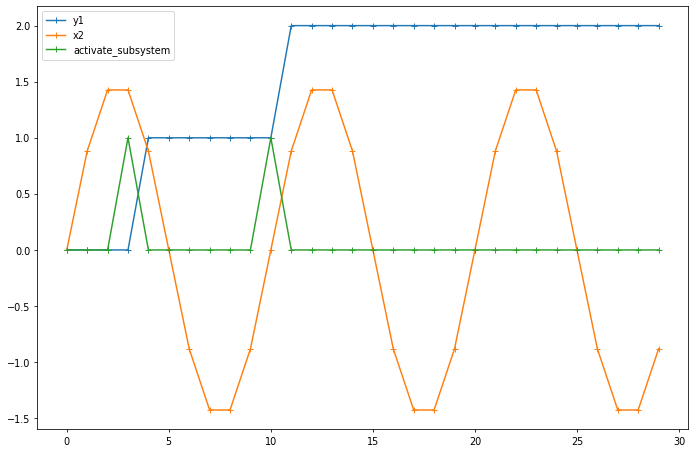

In [34]:
plt.figure(figsize=(12,8), dpi=70)
plt.plot( sim_results['y1'] , '+-' )
plt.plot( sim_results['y2'] , '+-' )
plt.plot( sim_results['activate_subsystem'] , '+-' )

plt.legend(['y1', 'x2', 'activate_subsystem'])
plt.show()

In [35]:
sim_results['y1']

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [36]:
assert_equal( sim_results['y1'] , [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.] )

In [37]:
sim_results['y2']

array([ 0.00000000e+00,  8.81677878e-01,  1.42658477e+00,  1.42658477e+00,
        8.81677878e-01,  1.83697020e-16, -8.81677878e-01, -1.42658477e+00,
       -1.42658477e+00, -8.81677878e-01,  0.00000000e+00,  8.81677878e-01,
        1.42658477e+00,  1.42658477e+00,  8.81677878e-01,  1.83697020e-16,
       -8.81677878e-01, -1.42658477e+00, -1.42658477e+00, -8.81677878e-01,
        0.00000000e+00,  8.81677878e-01,  1.42658477e+00,  1.42658477e+00,
        8.81677878e-01,  1.83697020e-16, -8.81677878e-01, -1.42658477e+00,
       -1.42658477e+00, -8.81677878e-01])

In [38]:
assert_approx( sim_results['y2'] , [ 0.00000000e+00,  8.81677878e-01,  1.42658477e+00,  1.42658477e+00,
        8.81677878e-01,  1.83697020e-16, -8.81677878e-01, -1.42658477e+00,
       -1.42658477e+00, -8.81677878e-01,  0.00000000e+00,  8.81677878e-01,
        1.42658477e+00,  1.42658477e+00,  8.81677878e-01,  1.83697020e-16,
       -8.81677878e-01, -1.42658477e+00, -1.42658477e+00, -8.81677878e-01,
        0.00000000e+00,  8.81677878e-01,  1.42658477e+00,  1.42658477e+00,
        8.81677878e-01,  1.83697020e-16, -8.81677878e-01, -1.42658477e+00,
       -1.42658477e+00, -8.81677878e-01] )

In [39]:
sim_results['activate_subsystem']

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
assert_equal( sim_results['activate_subsystem'] , [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.] )

# Return outputs in a struture



In [41]:
dy.clear()
system = dy.enter_system()

# the diagram

sinus = dy.signal_sinus(10)

# generate two events to trigger the subsystem's state update
activate_subsystem = dy.logic_or( dy.counter() == 3 , dy.counter() == 10 ) 

feedback_signal = dy.signal()

with dy.sub_if(activate_subsystem) as system:

    # y1 is a signal that is the results of a state-update (dy.delay()) without a direct feedthrough to an input to the if-subsystem
    # Therefore, feedback_signal can be set to be equal to y1 (feedback_signal << y1), resulting in a closed loop around and
    # passing through the if-subsystem.
    y1 = dy.delay(feedback_signal + 1)
    
    # y2 is a signal that directly passes through the if-subsystem
    y2 = 1.5 * sinus


    outputs = dy.structure({
        'y1' : y1,
        'y2' : y2
    })
    
    #
    # alternative...
    #
    
    #outputs = dy.structure(
    #    y1 = y1,
    #    y2 = y2
    #)
    
    outputs['y3'] = y1 * 2
    
    system.set_outputs( outputs.to_list() )

outputs.replace_signals( system.outputs )

    
y1 = outputs['y1']
y2 = outputs['y2']
y3 = outputs['y3']

feedback_signal << y1

    
# define output(s)

# instead of listing each element of the structure 'outputs', it is sufficient to call
# dy.append_output(outputs). In case a prefix shall be added to the signal names in the
# struture, dy.append_output(outputs, 'prefix'), can be used.

# dy.append_output(y1, 'y1')
# dy.append_output(y2, 'y2')
# dy.append_output(y3, 'y3')

dy.append_output(outputs)


dy.append_output(activate_subsystem, 'activate_subsystem')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())

#


compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


In [42]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=30)

In [43]:
assert_equal( sim_results['y1'] , [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.] )

In [44]:
assert_approx( sim_results['y2'] , [ 0.00000000e+00,  8.81677878e-01,  1.42658477e+00,  1.42658477e+00,
        8.81677878e-01,  1.83697020e-16, -8.81677878e-01, -1.42658477e+00,
       -1.42658477e+00, -8.81677878e-01,  0.00000000e+00,  8.81677878e-01,
        1.42658477e+00,  1.42658477e+00,  8.81677878e-01,  1.83697020e-16,
       -8.81677878e-01, -1.42658477e+00, -1.42658477e+00, -8.81677878e-01,
        0.00000000e+00,  8.81677878e-01,  1.42658477e+00,  1.42658477e+00,
        8.81677878e-01,  1.83697020e-16, -8.81677878e-01, -1.42658477e+00,
       -1.42658477e+00, -8.81677878e-01] )

In [45]:
assert_equal( sim_results['activate_subsystem'] , [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.] )

In [46]:
assert_approx( 2*sim_results['y1'], sim_results['y3'] )

In [47]:
# show the generated source code (uncomment as needed)

#from IPython.display import Code
#Code(data=code_gen_results['algorithm_sourcecode'], language='c++')

In [48]:
@ORTDtoNumpy()
def feedback(u):

    x   = dy.signal()

    x_dot = 0 - 0.5 * x + u
    
    with dy.sub_if(condition_signal=dy.boolean(True)) as system:

        # integrators
        x_ = dy.euler_integrator(x_dot, 0.01, 0)
        
        system.set_outputs([x_])
        
    x << system.outputs[0]
    
    return x
    
    

In [49]:
feedback(np.ones(10))

compiling system Sys1000 (level 1)... 
compiling system simulation (level 0)... 


array([0.        , 0.01      , 0.01995   , 0.02985025, 0.039701  ,
       0.04950249, 0.05925498, 0.06895871, 0.07861391, 0.08822084])

In [50]:
@ORTDtoNumpy()
def feedback2(u):

    x   = dy.signal()

    x_dot = 0 - 0.5 * x + u
    
    with dy.sub_if(condition_signal=dy.boolean(True)) as system:
        # in this subsystem the input x_dot is passed directly to the output (direct_feedthrough)
        # and at the same time, delayed (x_)

        # integrators
        x_ = dy.euler_integrator(x_dot, 0.01, 0)
        
        direct_feedthrough = x_dot * 2.0
        
        system.set_outputs([x_, direct_feedthrough])
        
    x                  << system.outputs[0]
    direct_feedthrough =  system.outputs[1]
    
    return x, direct_feedthrough
    
    

In [51]:
# TODO: not implemented

# x, direct_feedthrough = feedback2(np.ones(10))